import time

#Total duration in seconds
total_duration = 1000  #
#Number of iterations (you can change this)
iterations = total_duration
#Delay per iteration
delay = total_duration / iterations

for i in range(iterations):
    # Do something here if needed
    print(f"Step {i+1}/{iterations}")
    time.sleep(delay)

print("Done.")

In [1]:
%run ./"0 Imports and functions.ipynb"

# Load cube information 

File_Descriptor='cmz_CO_J3_2_'
#File_Descriptor='cmz_CO_J3_2__Low_Delta_'
#File_Descriptor='cmz_CO_J3_2_Unmatched'

##################################

import pickle 

with open("Spectral Cubes/Cube Information/"+File_Descriptor+"_Cube_Information", 'rb') as file:
    
    Cube_Information = pickle.load(file)
    
with open("Spectral Cubes/Cube Information/"+File_Descriptor+"_Pointing_Information", 'rb') as file:
    
    Pointing_Information = pickle.load(file)
    

print(Cube_Information)
File_Descriptor="cmz_CO_J3_2_Testing_No_Repeats" # This changes between files based on the line description
Cube_Information['File_Descriptor'] = File_Descriptor # This changes between files based on the line description
Cube_Information["Dendrogram_Noise_Threshold"]=5
#File_Descriptor='cmz_CO_J3_2__Low_Delta_edge_cases'
#Cube_Information['File_Descriptor']="cmz_CO_J3_2__Low_Delta_edge_cases" #krieger comp
#Cube_Information['spatial_scale'] = np.sqrt(Cube_Information['arc_per_pix_x']*Cube_Information['arc_per_pix_y'])*u.pix

#%matplotlib widget 
#%matplotlib notebook


/home/ben/miniconda3/bin/python
3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
astropy 5.1.dev153+gb740594dc
spectral_cube 0.6.1.dev22+g003ef16
spectral_cube file path /home/ben/.local/lib/python3.8/site-packages/spectral_cube/__init__.py
reproject 0.8
3.3.4 Matplotlib
/home/ben/miniconda3/lib/python3.8/site-packages/matplotlib/__init__.py
1.23.1 Numpy
astrodendro_file: /home/ben/.local/lib/python3.8/site-packages/astrodendro/__init__.py
Results will be saved to Directory ./Result Files
Cubes will be saved and loaded with Directory ./Spectral Cubes
Plots will be saved to Directory ./Plots
Dendrograms will be saved to Directory ./Dendrograms
{'Original_File_Name': '_cmz_CO_J3_2_Spliced_Smoothed_003-357.fits', 'File_Descriptor': 'cmz_CO_J3_2_', 'target': 'CMZ', 'center': <SkyCoord (Galactic): (l, b) in deg
    (359.94423333, -0.04616)>, 'crop_center': <SkyCoord (Galactic): (l, b) in deg
    (0., -0.)>, 'dist

# 3a. Analyze the dendrogram


File_Name = Cube_Information['File_Name']
Dend_Name= Cube_Information["Corresponding_Dendrogram"]
print(Dend_Name)

Dendrogram = astrodendro.Dendrogram.load_from('Dendrograms/'+Dend_Name)


i=0
l=0
m=0
for t in Dendrogram.all_structures: 
    if t.is_branch:
        l+=1
    if t.is_leaf:
        m+=1
        
    i+=1
print("Total structures:",i,"Branches:",l,'leaves:',m)

# Show the dendrogram

p1 = Dendrogram.plotter() 
v1 = Dendrogram.viewer()
v1.show()

In [2]:
print(Dend_Name)


NameError: name 'Dend_Name' is not defined


File_Name = Cube_Information['File_Name']
Dend_Name= Cube_Information["Corresponding_Dendrogram"]

Dendrogram = astrodendro.Dendrogram.load_from('Dendrograms/'+Dend_Name)


# Show the dendrogram

p1 = Dendrogram.plotter() 
v1 = Dendrogram.viewer()
v1.show()

# 3b. Structure Statistics.

In [2]:
# Load dendrogram and cubes
File_Name = Cube_Information['File_Name']
Dend_Name= Cube_Information["Corresponding_Dendrogram"]

Dendrogram = astrodendro.Dendrogram.load_from('Dendrograms/'+Dend_Name)
SC = SpectralCube.read("Spectral Cubes/"+File_Name).with_spectral_unit(u.km/u.s,velocity_convention="radio")

# Re update teh continuum cube
pathCont = Cube_Information["Corresponding_Continuum_Reprojected"]
scCont = spectral_cube.Projection.from_hdu(fits.open("Spectral Cubes/"+pathCont)) # {Why was there a  [0] here?}

try:
    BUNIT = scCont.unit
    print("The continuum has unit",BUNIT)
    scCont = scCont.to(u.Jy/u.beam) #Fails if unitless
    BUNIT = scCont.unit
    print("Change to:",BUNIT)
    print("verify unit length is non zero, length = ",len(str(BUNIT)),str(BUNIT)) #Fails if there is no unit

except:
    print("The continuum is unitless; unit defaults to Jy/beam")
    scCont = scCont*u.Jy/u.beam #Some data was taken before BUNIT were implemented, but they are in Jy/beam
        
Use_Dict = {'desired_beam_oversampling': "NA"} # this is irrelevant since the continuum is higher resolution than the data cubes
Use_Dict["distance"] = Cube_Information["distance"] # same as for the data cube
Continuum_Information = Update_Cube_Information(Use_Dict,pathCont)
    
    
    
# usage: def Dendrogram_Stats(Dendrogram,Cube,Continuum_Cube,Continuum_Information,Cube_Information,Trunks=True,min_size=0*u.pc,max_size=18*u.pc,edge_cases=False,distance_calculation=False):

# Calculate the statistics from the function:
# The stats are in arrays, [[Leaves],[Branches]]
#Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,R_err = Dendrogram_Stats(Dendrogram,SC,scCont,Continuum_Information,Cube_Information,Trunks=True,edge_cases=False,min_size=0.0*u.pc,r_err=True)
Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,R_err = Dendrogram_Stats(Dendrogram,SC,scCont,Continuum_Information,Cube_Information,Trunks=True,edge_cases=False,min_size=0.0*u.pc,r_err=True,no_repeats=True)
#Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,R_err = Dendrogram_Stats(Dendrogram,SC,scCont,Continuum_Information,Cube_Information,Trunks=True,edge_cases=True,min_size=0.0*u.pc,r_err=True) #Kireger comp

#Save the result files

import pickle 

File_Name = Cube_Information['File_Name']

Results = [Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,R_err]

with open("Result Files/"+File_Descriptor+File_Name[0:len(File_Name)-5]+"_Results", 'wb') as file:
    pickle.dump(Results, file)
    

print("good")

The continuum has unit Jy / beam
Change to: Jy / beam
verify unit length is non zero, length =  9 Jy / beam
14838
14838
14838
14838
14838
14838
14838
14838
14838
14838
14838
14838
14838
14838
14838
17934
20211
22818
22818
22818
23171
23626
23890
34268
34268
34268
34268
34268
34268
34268
34268
34268
34968
35717
53871
53871
53871
53871
53871
53871
53871
60588
60588
60588
60588
60588
61085
62791
63324
64115
65285
65527
67018
68003
68326
68503
74714
74714
74714
76480
76758
77235
78555
78773
79444
79886
82167
82167
82167
82348
82527
83105
84207
87713
87713
87713
88558
90155
90661
91023
91094
91997
92507
92901
95686
96119
97365
97649
99312
100526
100696
101632
101768
110047
110047
110047
110047
110047
110047
110047
110047
110047
111456
111667
111945
113596
113596
113596
113596
113596
122851
122851
122851
124620
124682
125047
125261
139038
139038
139038
139167
140587
140892
142106
142269
142573
144763
144763
144763
146056
146249
146312
146974
147044
147082
147116
147178
147338
147978
148208
1

In [3]:
Results = [Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,R_err]

#print(Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances)
print(np.shape(Size))
print(len(Size[0]),len(Size[1]))
#print(Results)


(2,)
427 82


# 3c. Analyze Statistics

In [4]:

Size,RMS_Velocity,V_rms_err,Luminosity,CDs,SIDs,MOM0_FLUX,Distances,R_err = Results

print("Size in ", Size[0][0].unit,"Sigma in",RMS_Velocity[0][0].unit,"Luminosity in",Luminosity[0][0].unit,"CD in",CDs[0][0].unit,'Mom 0 in',MOM0_FLUX[0][0].unit )


#Split the arrays, and strip teh units so i can plot them:

def strip_units(quantity_list):
    return [q.value for q in quantity_list]

# Convert each to unitless lists
Size_Leaves, Size_Branches, Size_All = strip_units(Size[0]), strip_units(Size[1]), (np.concatenate((strip_units(Size[0]), strip_units(Size[1]))))
RMS_Velocity_Leaves, RMS_Velocity_Branches, RMS_Velocity_All = strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]), (np.concatenate((strip_units(RMS_Velocity[0]), strip_units(RMS_Velocity[1]))))
V_rms_err_Leaves, V_rms_err_Branches, V_rms_err_All = strip_units(V_rms_err[0]), strip_units(V_rms_err[1]), (np.concatenate((strip_units(V_rms_err[0]), strip_units(V_rms_err[1]))))
Luminosity_Leaves, Luminosity_Branches, Luminosity_All = strip_units(Luminosity[0]), strip_units(Luminosity[1]), (np.concatenate((strip_units(Luminosity[0]), strip_units(Luminosity[1]))))
CDs_Leaves, CDs_Branches, CDs_All = strip_units(CDs[0]), strip_units(CDs[1]), (np.concatenate((strip_units(CDs[0]), strip_units(CDs[1]))))
SIDs_Leaves, SIDs_Branches, SIDs_All = (SIDs[0]), (SIDs[1]), (np.concatenate((SIDs[0], SIDs[1])))
MOM0_FLUX_Leaves, MOM0_FLUX_Branches, MOM0_FLUX_All = strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]), (np.concatenate((strip_units(MOM0_FLUX[0]), strip_units(MOM0_FLUX[1]))))
R_err_Leaves, R_err_Branches, R_err_All = strip_units(R_err[0]), strip_units(R_err[1]), (np.concatenate((strip_units(R_err[0]), strip_units(R_err[1]))))


nth = 0 # sorted(CD[0])[len(CD[0])-20]

pc_per_pixel = Cube_Information["spatial_scale_x"]
sig_per_pixel= Cube_Information["velocity_scale"] #np.nan#metadata['spectral_resolution']/u.pix


#Do a curve fit of the data

from scipy.optimize import curve_fit
from scipy.optimize import leastsq

#Define the form of the function for the curve_fit
def func(R,a,b):
    return a*R**(b)


#determine the size-linewidth:
#Leaves
popt, pcov = curve_fit(func, Size_Leaves,RMS_Velocity_Leaves) # The fit matrix and the covariance matrix (which gives the error on the fit)

#branches
poptB, pcovB = curve_fit(func,  Size_Branches,RMS_Velocity_Branches) 

#leaves and branches
popt_All, pcov_All = curve_fit(func,  Size_All,RMS_Velocity_All)



#Radius Luminosity fit
#Good pixels are places where the luminosity (and, therefore, column density) are above zero

gp = np.where(Luminosity_All>0)
lgp = Luminosity_All[gp]
radgp = Size_All[gp]

gp2 = np.where(Luminosity_All>0)
cgp = CDs_All[gp2]
rgp = RMS_Velocity_All[gp2]**2/Size_All[gp2]

radgpFORRAT = Size_All[gp2]
siggpFORRAT = RMS_Velocity_All[gp2]
lumFORRAT = Luminosity_All[gp2]
mom0FORRAT = MOM0_FLUX_All[gp2]

gp7 = np.where((cgp > 0) & (~np.isnan(cgp)))
cgp = cgp[gp7]
rgp = rgp[gp7]

radgpFORRAT = radgpFORRAT[gp7]
siggpFORRAT = siggpFORRAT[gp7]
lumFORRAT = lumFORRAT[gp7]
mom0FORRAT = mom0FORRAT[gp7]
RLpopt,RLpcov = curve_fit(func, np.array(radgp,dtype='float64'),np.array(lgp,dtype='float64'),maxfev=999999,p0 = np.array([10**27,1],dtype='float64'),ftol = 10**-10)


#Column density to Size-linewidth
CDpopt,CDpcov = curve_fit(func, np.array(cgp,dtype='float64') ,np.array(rgp,dtype='float64'),maxfev=9999099,p0 = np.array([10,.01],dtype='float64'),ftol = 10**-10)


# Make luminosity-SL ratio plots (for finding boundary conditions from the assumed mass)

gp3 = np.where(lumFORRAT>0)
lumFORRAT = lumFORRAT[gp3]
rgpFORRAT = rgp[gp3]
mom0FORRAT = mom0FORRAT[gp3]
gp4=np.where(MOM0_FLUX_All>0)
mom0FORFlux=MOM0_FLUX_All[gp4]
radgpFORFlux=Size_All[gp4]
rgpFORFlux=RMS_Velocity_All[gp4]**2/Size_All[gp4]






Size in  pc Sigma in km / s Luminosity in erg / (Hz s) CD in 1 / cm2 Mom 0 in K km / s


# 3x. Save fit results

In [5]:

popt[0],popt[1],poptB[0],poptB[1],popt_All[0],popt_All[1]

SL_Fits = [[popt,pcov],[poptB,pcovB],[popt_All,pcov_All]]
RL_Fits = [RLpopt,RLpcov]
CD_SL_Ratio = [CDpopt,CDpcov]
  


# The fits, each fit has the [popt,pcov], (the fit and covariance matrix)
Fit_Results=SL_Fits,RL_Fits,CD_SL_Ratio #Fits: [[Size_Linewidth_Leaves,Size_Linewidth_Branches,Size_Linewidth_All],[Radius_Luminosity_All],[CD_SL-Ratio]]

import pickle 

File_Name = Cube_Information['File_Name']

with open("Result Files/"+File_Descriptor+File_Name[0:len(File_Name)-5]+"_Fit_Results", 'wb') as file:
    pickle.dump(Fit_Results, file)

# x. make some plots

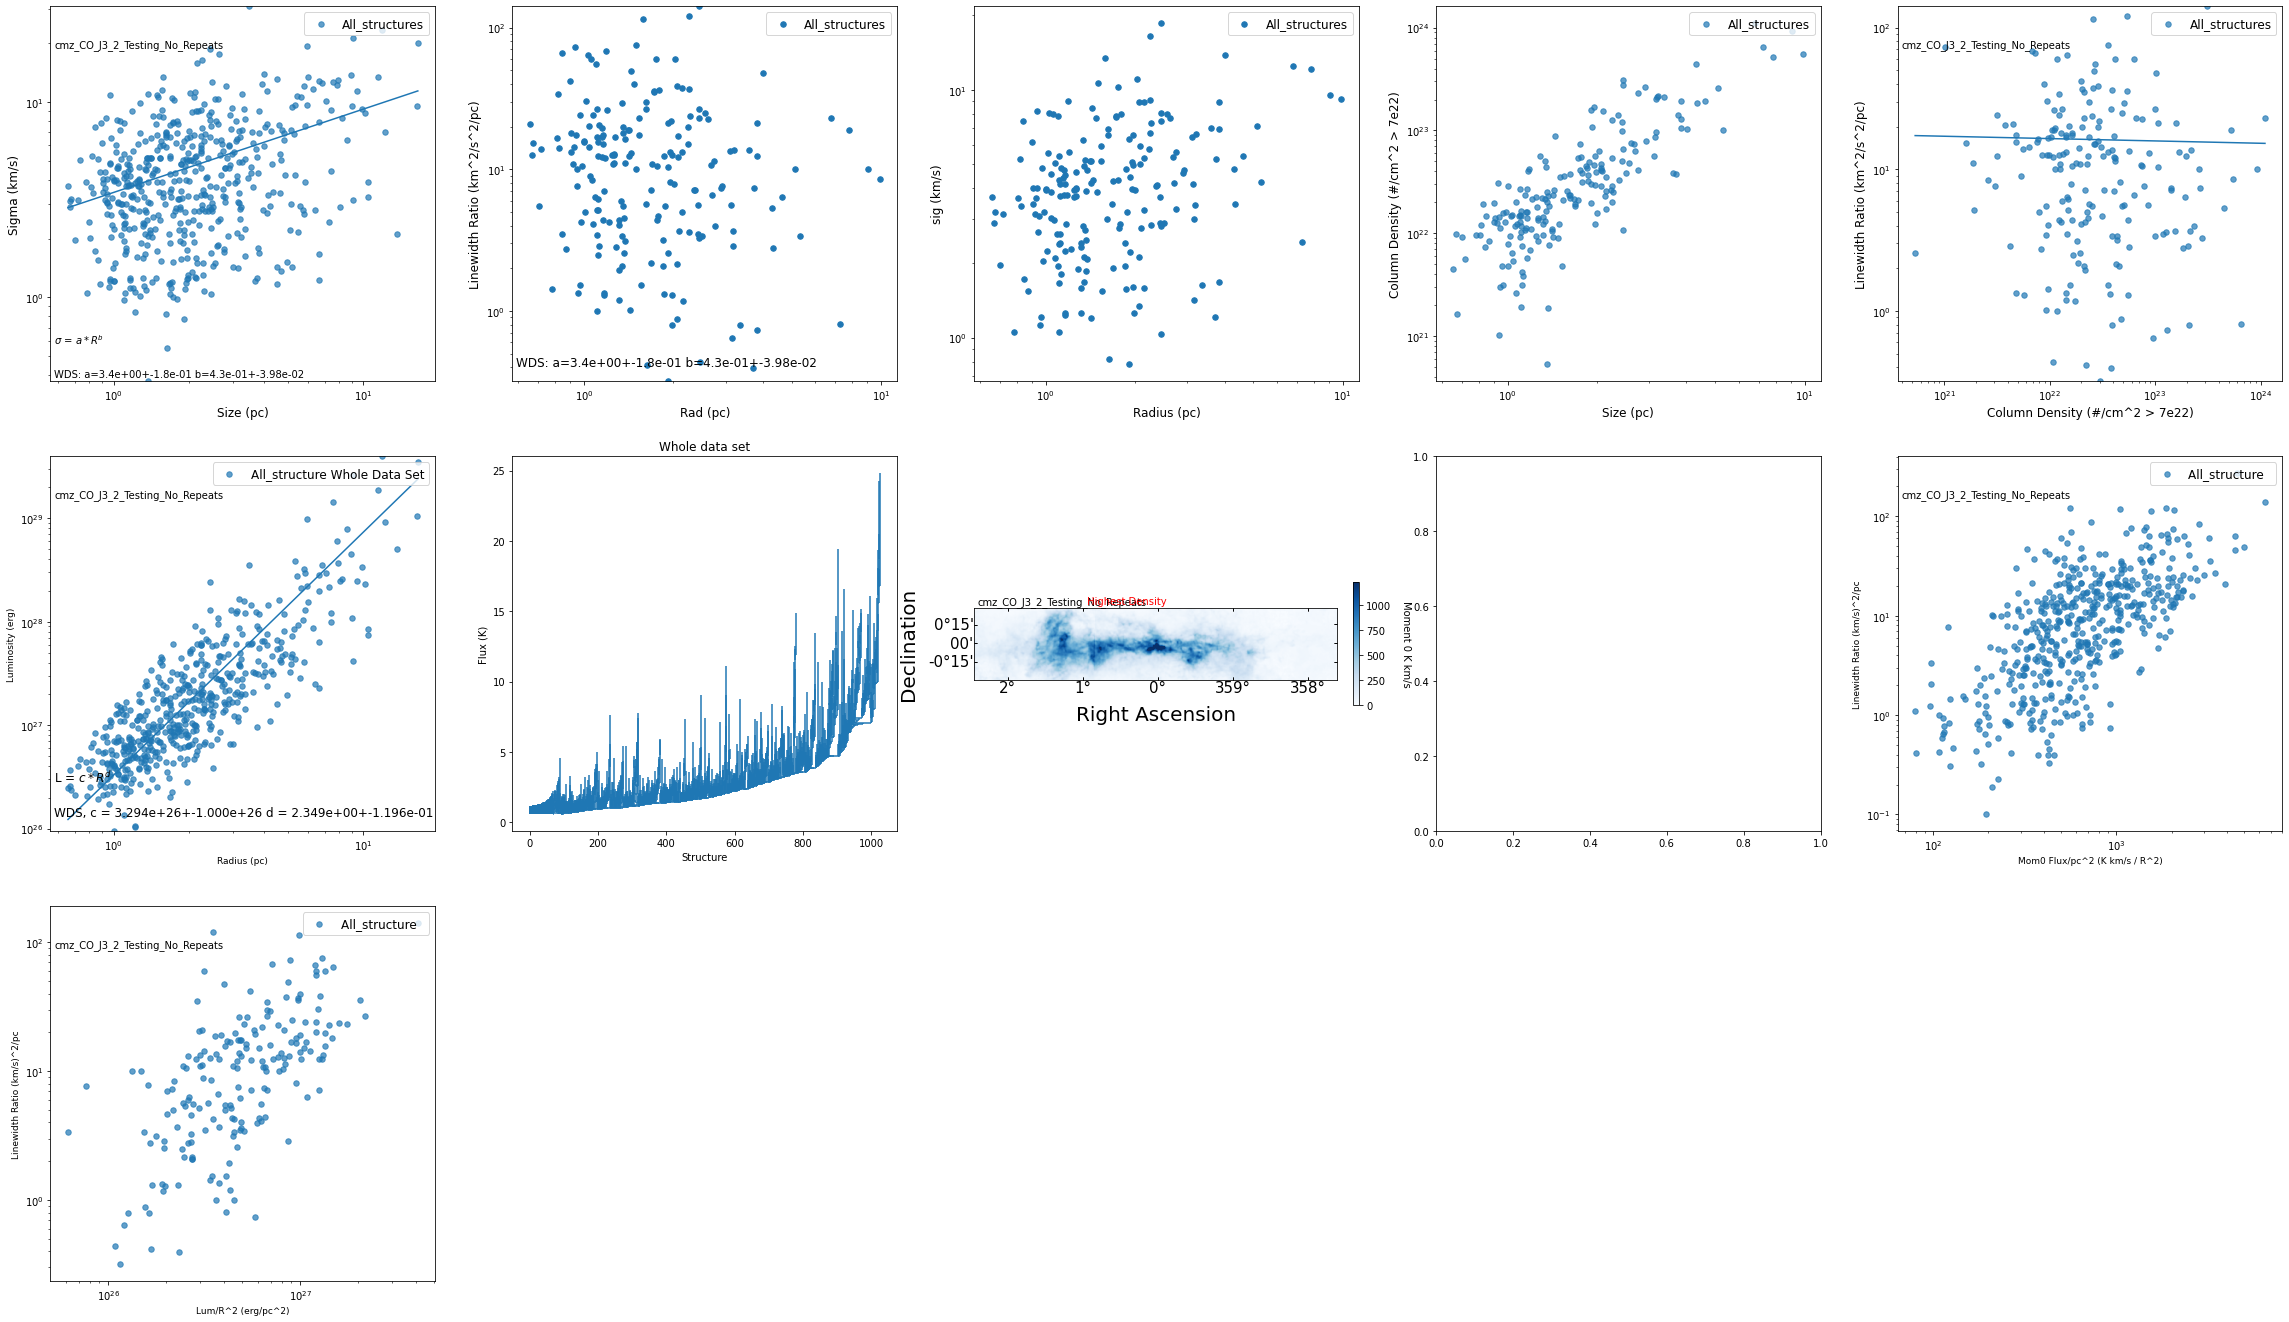

In [6]:
# Plot contours for the top ten clusters

fig = plt.figure(1,figsize=(40,40))


axAlpha = pylab.subplot(5, 5, 7)
axBeta = pylab.subplot(5, 5, 8)
axGamma = pylab.subplot(5, 5, 9)
axDelta = pylab.subplot(5, 5, 10)







p1=Dendrogram.plotter()
p1.plot_tree(axAlpha)

axAlpha.set_xlabel("Structure")
axAlpha.set_ylabel("Flux (K)")
axAlpha.set_title("Whole data set")



SC_moment0 =SC.moment0()
'''
bp = np.where(CDs<=7*10**22/u.cm**2)
bp2 = np.where(SC_moment0.hdu.data < (np.nanstd(SC_moment0.hdu.data,where= ((SC_moment0.hdu.data>0)  | (SC_moment0.hdu.data<0) )))) # below the Noise (K km/s)

SC_moment0.hdu.data[bp2]=np.nan


scCropped.hdu.data[bp]=np.nan

'''

axDelta = pylab.subplot(5,5,8,projection=SC_moment0.wcs)


imBeta = axDelta.imshow(SC_moment0.hdu.data, origin='lower', interpolation='nearest', cmap=plt.cm.Blues,vmin=0,vmax = np.nanmax(SC_moment0.hdu.data)*.7 )


G1 = True

RA = axDelta.coords[0]                                                                  # 
Dec = axDelta.coords[1]






RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3) 
RA.set_ticklabel(exclude_overlapping=True) 
Dec.set_ticklabel(exclude_overlapping=True)                                                                                     
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=1)
axDelta.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(imBeta,fraction=0.016,pad=0.04)                                     
cb.set_label(label="Moment 0 K km/s",fontsize=10,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
pylab.annotate(s=File_Descriptor,fontsize=10,xy=(.01,1.05),xycoords="axes fraction",c="black")  
pylab.annotate(s="Highest Density",fontsize=10,xy=(.31,1.05),xycoords="axes fraction",c="red")  





# Make a line showing each of the fits (SL fit):

xs=np.linspace(np.nanmin(Size_All),np.nanmax(Size_All),50)
ysL,ysB,ysCon=func(xs,popt[0],popt[1]),func(xs,poptB[0],poptB[1]),func(xs,popt_All[0],popt_All[1])

# Make a line showing the fits (RAD-LUM fit):

xsRL=np.linspace(np.nanmin(radgp),np.nanmax(radgp),50)
ysRL = func(xsRL,RLpopt[0],RLpopt[1])

# Make a line showing the fits (Column density fit):

xsCD=np.linspace(np.nanmin(cgp),np.nanmax(cgp),50)
ysCD = func(xsCD,CDpopt[0],CDpopt[1])










ax2 = pylab.subplot(5, 5, 1)
ax3 = pylab.subplot(5, 5, 2)
ax4 = pylab.subplot(5, 5, 3)

xpcon = ax2.scatter(Size_All,RMS_Velocity_All,label="All_structures",s=30,alpha=.7)


p = ax2.plot(xs,ysCon)





st="WDS: a="+ str(np.format_float_scientific(popt_All[0],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcov_All[0][0]),1))+" b="+str(np.format_float_scientific(popt_All[1],1))+"+-"+str(np.format_float_scientific(np.sqrt(pcov_All[1][1]),2))

ax2.annotate(s=st,fontsize=10,xy=(0.01,0.01),xycoords="axes fraction")

ax2.annotate(s=r'$\sigma$ = $a*R^b$',fontsize=10,xy=(0.01,0.10),xycoords="axes fraction")
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylim(np.nanmin(RMS_Velocity_All),np.nanmax(RMS_Velocity_All))
ax2.set_xlabel("Size (pc)",fontsize=12)
ax2.set_ylabel("Sigma (km/s)",fontsize=12)
ax2.legend(prop={'size': 12},loc="upper right")
ax2.annotate(s=File_Descriptor,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")

#gp = np.where(FRs>0)







xspL = ax4.scatter(radgpFORRAT,siggpFORRAT,label="All_structures",s=30)




ax4.set_yscale('log')
ax4.set_xscale('log')

ax4.set_xlabel("Radius (pc)",fontsize=12)
ax4.set_ylabel("sig (km/s)",fontsize=12)
ax4.legend(prop={'size': 12},loc="upper right")






xspF = ax3.scatter(radgpFORRAT,rgp,label="All_structures",s=30)

ax3.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")
ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax3.set_xlabel("Rad (pc)",fontsize=12)
ax3.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax3.legend(prop={'size': 12})





ax5 = pylab.subplot(5, 5, 4)
ax6 = pylab.subplot(5, 5, 5)
ax7 = pylab.subplot(5, 5, 6)



xpconhh = ax5.scatter(radgpFORRAT,cgp,label="All_structures",s=30,alpha=.7)
ax5.set_yscale('log')
ax5.set_xscale('log')
ax5.set_xlabel("Size (pc)",fontsize=12)
ax5.set_ylabel("Column Density (#/cm^2 > 7e22)",fontsize=12)
ax5.legend(prop={'size': 12},loc="upper right")




xspF2 = ax6.scatter(cgp,rgp,label="All_structures",s=30,alpha=.7)
pF2 = ax6.plot(xsCD,ysCD)

ax6.set_yscale('log')
ax6.set_xscale('log')
ax6.set_ylim(np.nanmin(rgp),np.nanmax(rgp))
ax6.set_xlabel("Column Density (#/cm^2 > 7e22)",fontsize=12)
ax6.set_ylabel("Linewidth Ratio (km^2/s^2/pc)",fontsize=12)
ax6.legend(prop={'size': 12},loc="upper right")
ax6.annotate(s=File_Descriptor,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")




xspLu2 = ax7.scatter(radgp,lgp,label="All_structure Whole Data Set",s=30,alpha=.7)
pFLLu2 = ax7.plot(xsRL,ysRL)

st = "WDS, c = "+ str(np.format_float_scientific(RLpopt[0],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[0][0]),3))+" d = "+str(np.format_float_scientific(RLpopt[1],3))+"+-"+str(np.format_float_scientific(np.sqrt(RLpcov[1][1]),3))
ax7.annotate(s='L = $c*R^d$',fontsize=12,xy=(0.01,0.13),xycoords="axes fraction")
ax7.annotate(s=st,fontsize=12,xy=(0.01,0.04),xycoords="axes fraction")

ax7.set_yscale('log')
ax7.set_xscale('log')
ax7.set_ylim(np.nanmin(lgp),np.nanmax(lgp))
ax7.set_xlabel("Radius (pc)",fontsize=9)
ax7.set_ylabel("Luminosity (erg)",fontsize=9)
ax7.legend(prop={'size': 12},loc="upper right")
ax7.annotate(s=File_Descriptor,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


axLam = pylab.subplot(5, 5, 11)
lum_rat = axLam.scatter(lumFORRAT/radgpFORRAT**2,rgpFORRAT,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axLam.set_yscale('log')
axLam.set_xscale('log')
axLam.set_xlabel("Lum/R^2 (erg/pc^2)",fontsize=9)
axLam.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axLam.legend(prop={'size': 12},loc="upper right")
axLam.annotate(s=File_Descriptor,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")



axDelta = pylab.subplot(5, 5, 10)






mom0_rat = axDelta.scatter(mom0FORFlux/radgpFORFlux**2,rgpFORFlux,label="All_structure  ",s=30,alpha=.7)
#Off by factors for area, simply using r^2

axDelta.set_yscale('log')
axDelta.set_xscale('log')
axDelta.set_xlabel("Mom0 Flux/pc^2 (K km/s / R^2)",fontsize=9)
axDelta.set_ylabel("Linewidth Ratio (km/s)^2/pc",fontsize=9)
axDelta.legend(prop={'size': 12},loc="upper right")
axDelta.annotate(s=File_Descriptor,fontsize=10,xy=(0.01,0.89),xycoords="axes fraction")


pylab.show()

